# How to Automate Data Cleaning with AI <a id="make-a-data-cleaning-agent"></a>

In this tutorial, you will learn how to automate data cleaning with AI. It can automatically:

- detect and fix common data cleaning issues
- missing values
- duplicate rows
- inconsistent data types. 
 
By using this AI agent, you can save time and effort on data cleaning, allowing you to focus on more important tasks.

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)


# Table of Contents

1. [Make A Data Cleaning Agent](#make-a-data-cleaning-agent)
2. [Load Libraries](#load-libraries)
3. [Setup AI and Logging](#setup-ai-and-logging)
4. [Load a Dataset](#load-a-dataset)
5. [Create The Agent](#create-the-agent)
6. [Response](#response)
7. [The cleaning recipe](#the-cleaning-recipe)
8. [Data Cleaner Function](#data-cleaner-function)
9. [Cleaned Data As Pandas Data Frame](#cleaned-data-as-pandas-data-frame)
10. [Free Generative AI Data Science Workshop](#free-generative-ai-data-science-workshop)

### Load Libraries <a id="load-libraries"></a>

In [1]:
# * Libraries

from langchain_openai import ChatOpenAI
import os
import yaml
import pandas as pd
from pprint import pprint

from ai_data_science_team.agents import DataCleaningAgent

### Setup AI and Logging <a id="setup-ai-and-logging"></a>

This section of code sets up the LLM inputs and the logging information. Logging is used to store AI-generated code and files during the AI Data Science Teams processing of files. 

*Important Note:* This example uses OpenAI's API. But any LLM can be used such as Anthropic or local LLMs with Ollama.

In [2]:
# * Setup

MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = os.path.join(os.getcwd(), "logs/")

os.environ["OPENAI_API_KEY"] = yaml.safe_load(open('../credentials.yml'))['openai']

llm = ChatOpenAI(model = MODEL)

llm


ChatOpenAI(profile={'max_input_tokens': 128000, 'max_output_tokens': 16384, 'image_inputs': True, 'audio_inputs': False, 'video_inputs': False, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': False, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'pdf_inputs': True, 'pdf_tool_message': True, 'image_tool_message': True, 'tool_choice': True}, client=<openai.resources.chat.completions.completions.Completions object at 0x149ac52d0>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x14ee47190>, root_client=<openai.OpenAI object at 0x149ac5420>, root_async_client=<openai.AsyncOpenAI object at 0x14ee470d0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'), stream_usage=True)

### Load a Dataset <a id="load-a-dataset"></a>

Next, let's load a customer churn data set that we will clean up. 

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/business-science/ai-data-science-team/refs/heads/master/data/churn_data.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### Create The Agent <a id="create-the-agent"></a>

Run this code to create an agent with `make_data_cleaning_agent()`.

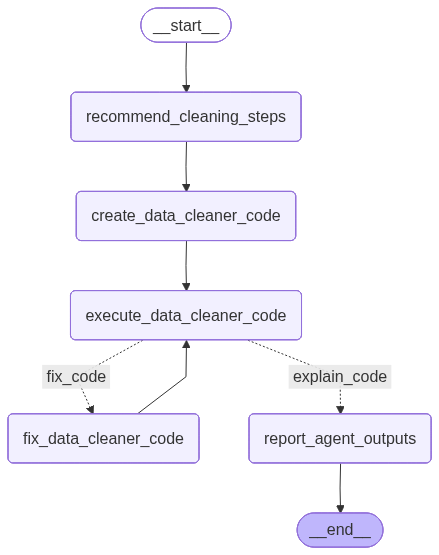

In [4]:
data_cleaning_agent = DataCleaningAgent(
    model = llm, 
    log=LOG, 
    log_path=LOG_PATH
)

data_cleaning_agent

This creates an `app`, which is a langgraph agent with the main inputs:

- **user_instructions**: The data cleaning agent will use these comments to modify the "standard recipe" 
  - Standard Recipe: The standard cleaning recipe which includes removing columns with more than 40% missing values, imputing missing values using mean (numeric) or mode (categorical), removing duplicate rows, and removing outliers. 
- **data_raw**: The raw data to be cleaned
- **max_retries**: Used to limit the number of attempts to fix the python code generated by the agent. Set this to 3 to limit to 3 attempts. 
- **retry_count**: Set this to 0. 

In [5]:
data_cleaning_agent.invoke_agent(
    data_raw=df,
    user_instructions="Don't remove outliers when cleaning the data.",
    max_retries=3,
    retry_count=0
)  

---DATA CLEANING AGENT----
    * RECOMMEND CLEANING STEPS
    * CREATE DATA CLEANER CODE
      File saved to: /Users/mdancho/Desktop/course_code/ai-data-science-team/logs/data_cleaner.py
    * EXECUTE DATA CLEANER CODE (SANDBOXED)
    * REPORT AGENT OUTPUTS


{'messages': [AIMessage(content='{\n  "report_title": "Data Cleaning Agent Outputs",\n  "recommended_steps": "# Recommended Data Cleaning Steps:\\nHere are the recommended steps to clean and preprocess the dataset, taking into account the provided data characteristics and user instructions:\\n\\n1. **Remove Columns with Excessive Missing Data:**\\n   - Check each column for missing values and remove any column where more than 40% of the data is missing.\\n   ```python\\n   # Calculate the percentage of missing values per column\\n   missing_percentage = dataset.isnull().mean() * 100\\n   # Drop columns where missing percentage > 40%\\n   columns_to_remove = missing_percentage[missing_percentage > 40].index\\n   dataset.drop(columns=columns_to_remove, inplace=True)\\n   ```\\n\\n2. **Impute Missing Values in Numeric Columns:**\\n   - For numeric columns, replace missing values with the mean of the column.\\n   ```python\\n   # Impute missing values with mean for numeric columns\\n   num

### Response <a id="response"></a>

The response produced contains everything we need to understand the data cleaning decisions made and get the cleaned dataset. 

In [6]:
response = data_cleaning_agent.get_response()

list(response.keys())

['messages',
 'user_instructions',
 'recommended_steps',
 'data_raw',
 'data_cleaned',
 'all_datasets_summary',
 'data_cleaner_function',
 'data_cleaner_function_path',
 'data_cleaner_file_name',
 'data_cleaner_function_name',
 'data_cleaner_error',
 'data_cleaning_summary',
 'data_cleaner_error_log_path',
 'max_retries',
 'retry_count']

#### Cleaned Data As Pandas Data Frame <a id="cleaned-data-as-pandas-data-frame"></a>

Use the `get_data_cleaned()` method to get the cleaned data as a pandas data frame.

In [7]:
data_cleaning_agent.get_data_cleaned()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


#### Data Cleaner Function <a id="data-cleaner-function"></a>

We can use the `get_data_cleaner_function()` method to get the data cleaner function pipeline. 

- In Jupyter Notebooks, setting `markdown=True` will return the function as markdown code. 
- In Streamlit apps, it's recommended to set `markdown=False`.

In [8]:
data_cleaning_agent.get_data_cleaner_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: data_cleaning_agent
# Time Created: 2025-12-08 19:54:41

def data_cleaner(data_raw):
    import pandas as pd
    import numpy as np


    # Step 1: Remove Columns with Excessive Missing Data
    missing_percentage = data_raw.isnull().mean() * 100
    columns_to_remove = missing_percentage[missing_percentage > 40].index
    data_raw.drop(columns=columns_to_remove, inplace=True)

    # Step 2: Impute Missing Values in Numeric Columns
    numeric_cols = data_raw.select_dtypes(include=[np.number]).columns
    data_raw[numeric_cols] = data_raw[numeric_cols].fillna(data_raw[numeric_cols].mean())

    # Step 3: Impute Missing Values in Categorical Columns
    categorical_cols = data_raw.select_dtypes(include=[object]).columns
    for col in categorical_cols:
        data_raw[col].fillna(data_raw[col].mode()[0], inplace=True)

    # Step 4: Convert 'TotalCharges' Column to Numeric
    data_raw['TotalCharges'] = pd.to_numeric(data_raw['TotalCharges'], errors='coerce')

    # Step 5: Remove Duplicate Rows
    data_raw.drop_duplicates(inplace=True)

    # Step 6: Remove Rows with Missing Values (after imputation)
    data_raw.dropna(inplace=True)

    # Step 7: Analyze Data for Additional Cleaning Needs
    # Since no additional steps are indicated, we won't perform further actions here.

    return data_raw
```

#### Recommended Steps

To get the recommended steps during the data analysis (prior to coding), run the `get_recommended_steps()` method.

In [9]:
data_cleaning_agent.get_recommended_cleaning_steps(markdown=True)

# Recommended Data Cleaning Steps:
Here are the recommended steps to clean and preprocess the dataset, taking into account the provided data characteristics and user instructions:

1. **Remove Columns with Excessive Missing Data:**
   - Check each column for missing values and remove any column where more than 40% of the data is missing.
   ```python
   # Calculate the percentage of missing values per column
   missing_percentage = dataset.isnull().mean() * 100
   # Drop columns where missing percentage > 40%
   columns_to_remove = missing_percentage[missing_percentage > 40].index
   dataset.drop(columns=columns_to_remove, inplace=True)
   ```

2. **Impute Missing Values in Numeric Columns:**
   - For numeric columns, replace missing values with the mean of the column.
   ```python
   # Impute missing values with mean for numeric columns
   numeric_cols = dataset.select_dtypes(include=[np.number]).columns
   dataset[numeric_cols] = dataset[numeric_cols].fillna(dataset[numeric_cols].mean())
   ```

3. **Impute Missing Values in Categorical Columns:**
   - For categorical columns, replace missing values with the mode of the column.
   ```python
   # Impute missing values with mode for categorical columns
   categorical_cols = dataset.select_dtypes(include=[object]).columns
   for col in categorical_cols:
       dataset[col].fillna(dataset[col].mode()[0], inplace=True)
   ```

4. **Convert Columns to Correct Data Types:**
   - Convert 'TotalCharges' from object to numeric (e.g., float) after handling any conversion issues (e.g., if it contains non-numeric characters).
   ```python
   # Convert 'TotalCharges' to numeric
   dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')
   ```

5. **Remove Duplicate Rows:**
   - Identify and remove any duplicate rows in the dataset.
   ```python
   dataset.drop_duplicates(inplace=True)
   ```

6. **Remove Rows with Missing Values:**
   - As a last resort, if there are still missing values after imputation, remove any rows which still have missing data.
   ```python
   dataset.dropna(inplace=True)
   ```

7. **Analyze Data for Additional Cleaning Needs:**
   - Check for any additional cleaning steps needed based on the specifics of the dataset (e.g., incorrect values, inconsistent categorical entries).
   - Note: If no additional steps are required, state that explicitly (after analysis).

**Important Note:** Since the user requested not to remove outliers, we will not include any steps to identify or remove rows with extreme outliers.

By following these steps, the dataset will be cleaned and prepared for further analysis or modeling while adhering to the user’s requirements.

### Want To Become A Full-Stack Generative AI Data Scientist?

![Generative AI Data Scientist](../img/become_a_generative_ai_data_scientist.jpg)

I teach Generative AI Data Science to help you build AI-powered data science apps. [**Register for my next Generative AI for Data Scientists workshop here.**](https://learn.business-science.io/ai-register)